In [62]:
using Pkg; Pkg.activate("C:\\Users\\KarlH\\Desktop\\ComputationalPhysicsMaster\\Code\\OrbitalNeuralMethods")
using Revise
using OrbitalNeuralMethods
import OrbitalNeuralMethods as onm

  Activating project at `C:\Users\KarlH\Desktop\ComputationalPhysicsMaster\Code\OrbitalNeuralMethods`


In [68]:
ω = 0.25
ham = HOCoulomb(ω, shielding = 0.25);
l = 30
basis = SpinBasis(HOBasis(l, ω))
grid = [x for x in range(-10, stop = 10, length = 2001)]
mixer = Alpha(0.5)

Alpha(0.5)

In [109]:
ps = [4, 8, 16, 24, 48, 60]

6-element Vector{Int64}:
  4
  8
 16
 24
 48
 60

In [106]:
times

6×5 Matrix{Float64}:
 0.0981968  0.171856  0.281861  1.0858   1.48363
 0.0957443  0.157978  0.265311  1.0051   1.61465
 0.0796196  0.137883  0.278578  1.01255  1.50619
 0.0921079  0.168634  0.294624  1.04012  1.66801
 0.0        0.0       0.0       0.0      0.0
 0.0        0.0       0.0       0.0      0.0

In [108]:
ps = [48, 60]
hs = [25, 50, 75, 100, 150]

for (i, particles) in enumerate(ps)
    system = System(particles, basis, grid, ham);
    rhf = RHF(system, mixer);
    rhf = compute_ground_state!(rhf, max_iter = 100, tol = 1e-10, verbose=0);
    slater = Slater(rhf);
    for (j, hidden) in enumerate(hs)
        nn = NeuralNetwork([Dense(hidden), Sigmoid, Dense(hidden), Sigmoid, Dense(1), Exp], particles);
        wf = SlaterNN(slater, nn);

        metro = Importance(equils = 0, samples = 100000, step = 0.01);
        t = @elapsed result = blocking(wf, ham, metro, nthreads = 12);
        times[i+4, j] = t
    end
end

In [101]:
import Plots as plt
plt.pyplot()

Plots.PyPlotBackend()

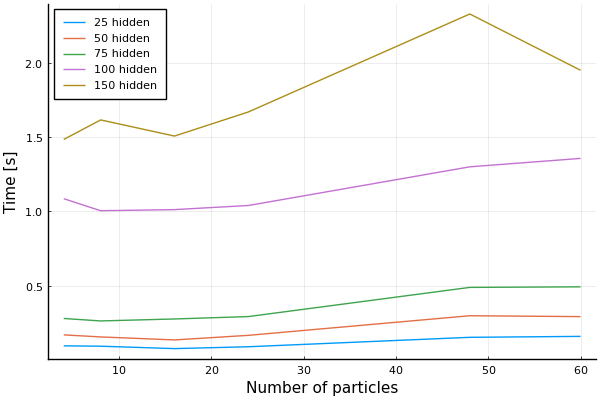

In [111]:
pt = plt.plot(ps, times[:, 1], label="25 hidden", legend=:topleft, xlabel="Number of particles", ylabel="Time [s]")
plt.plot!(ps, times[:, 2], label="50 hidden")
plt.plot!(ps, times[:, 3], label="75 hidden")
plt.plot!(ps, times[:, 4], label="100 hidden")
plt.plot!(ps, times[:, 5], label="150 hidden")